In [1]:
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from lxml import etree
from nltk.tokenize import word_tokenize
import seaborn as sns

In [2]:
# 生成词云
def create_word_cloud(f):
    print('根据词频,开始生成词云')
    # f = remove_stop_words(f)
    cut_text = word_tokenize(f)
    cut_text = " ".join(cut_text)
    wc = WordCloud(
        max_words=100,
        width=2000,
        height=1200,
    )
    wordcloud = wc.generate(cut_text)
    # 写词云图片
    wordcloud.to_file('market_basket_wordcloud.jpg')
    # 显示词云文件
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

根据词频,开始生成词云


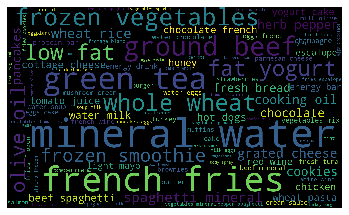

In [3]:
# 数据加载
data = pd.read_csv('Market_Basket_Optimisation.csv',header=None,sep='\t',names=['Transaction'])
data = data.fillna(0)
# 数据处理
transaction = pd.DataFrame(columns=['TransactionID','Transaction'])
for i,v in data.iterrows():
    for s in v:
        if type(s) is str:
            for t in s.split(','):
                s1 = pd.Series({'TransactionID' : i,'Transaction' : t})
                transaction=transaction.append(s1,ignore_index=True)
# 读取Transaction字段
all_word = " ".join(transaction['Transaction'])
# 生成词云
create_word_cloud(all_word)   

In [4]:
# 数据可视化探索
transaction_temp = transaction.groupby(['Transaction'])['Transaction'].count()

In [5]:
transaction_sort = pd.DataFrame(columns=['Transaction','add_count'])
for i in transaction_temp.items():
    s = pd.Series({'Transaction' : i[0],'add_count' : i[1]})
    transaction_sort=transaction_sort.append(s,ignore_index=True)

In [6]:
transaction_sort = transaction_sort.sort_values('add_count',ascending=False)
top10 = transaction_sort.head(10)

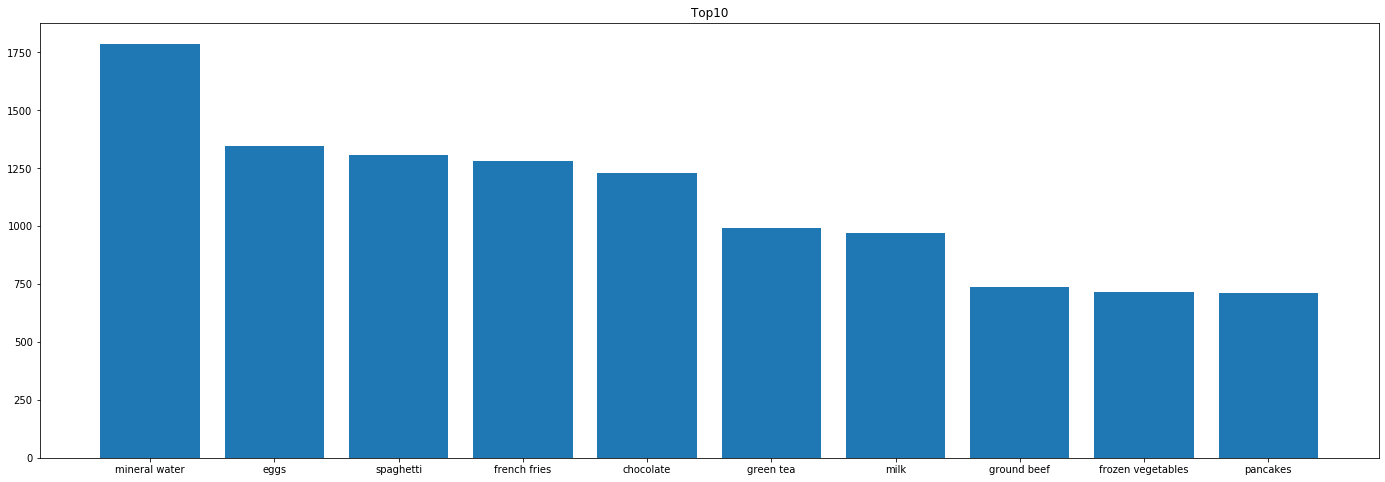

In [7]:
plt.figure(figsize=(24,8))
plt.bar(top10['Transaction'],top10['add_count'])
plt.title('Top10')
plt.show()